# Inaugural Project

## Setup and General Information

### Authors
- Serkan Korkmaz
- Evrim Nihan Mortensen

Imports and set magics:

In [376]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Imports and Parameters

In [377]:
## global parameters
## applicable to all
## exercises
alpha = 1/3
beta  = 2/3
endowment = [0.8, 0.3]

In [378]:
## Imports
from inauguralproject import utility, demand
import numpy as np
import matplotlib.pyplot as plt

## Question 1

### Initial Setup

We define the initial `utility` for consumer `A` and `B`. 

In [379]:
## 1) iniital utility
## for each consumer
initial_utility_a = utility(
    fraction = alpha, 
    good = endowment
)

initial_utility_b = utility(
    fraction = beta,
    good = [1 - x for x in endowment]
)

## 2) define range of good
## accordingly
goods = np.array(range(0,75))/74

To find the allocation that leaves both consumers as well off, we do a `cross join` using `meshgrid`,

In [390]:
## 1) define the 
## goods using linspace
## was originally 75
goods = np.linspace(
    start = 0,
    stop  = 1,
    num   = 100
) 

## 2) cross join
## the goods and store
## as good_1 an good_2
good_1, good_2 = np.meshgrid(goods, goods)

## 3) calculate the utility
## for all possible values
utility_a_values = utility(fraction=alpha, good=[good_1, good_2])
utility_b_values = utility(fraction=beta, good=[1-good_1, 1-good_2])

## 4) locate all cases where
## the utility is higher than the initial utility
## for each consumer
idx = (utility_a_values >= initial_utility_a) & (utility_b_values >= initial_utility_b)

## 5) select all 
## values that match
good_1_demand = good_1[idx]
good_2_demand = good_2[idx]


The corresponding pareto improvements can be plotted using `matplotlib`,

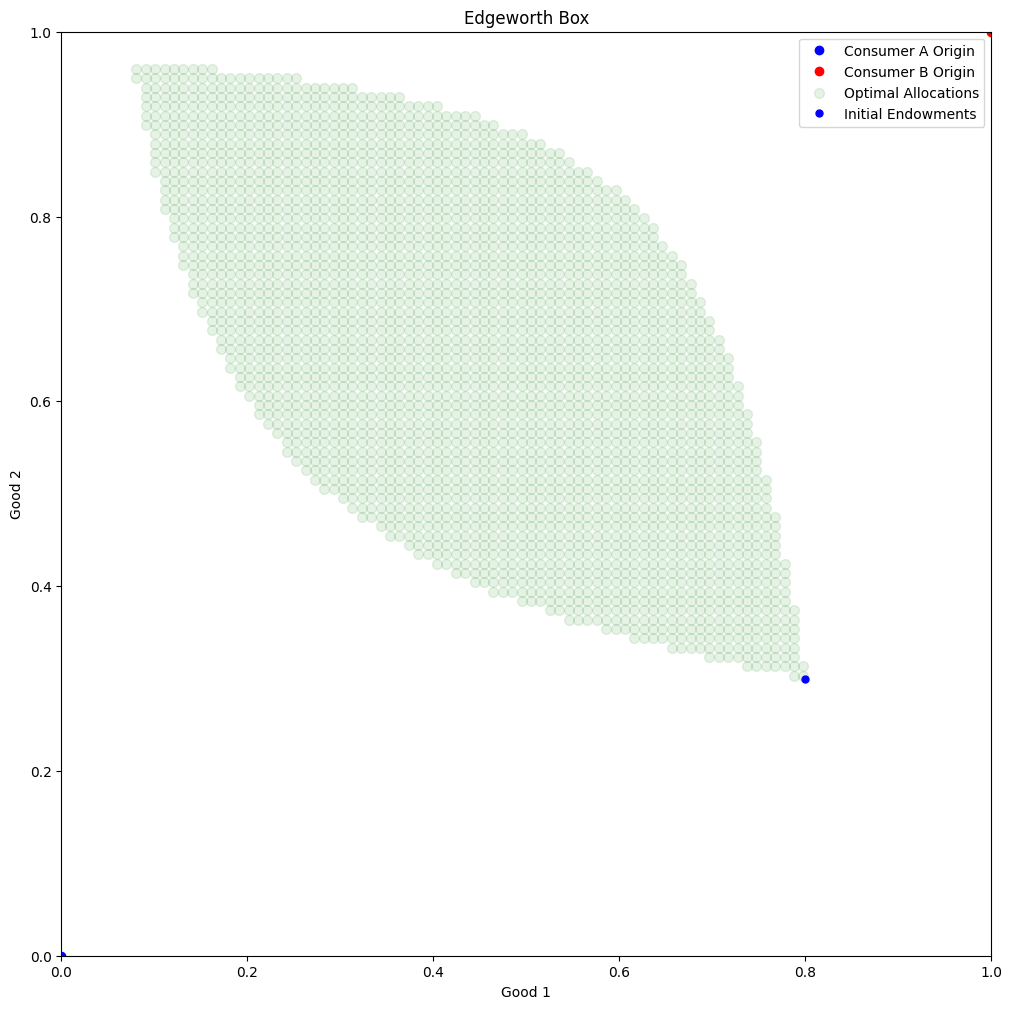

In [391]:
## 1) set the boundaries
## for each good
total_good1 = 1
total_good2 = 1

## 2) initialise
## the plot as ax
fig, ax = plt.subplots(figsize=(12, 12))

## 3) set the limits for the
## y- and x-axis;
ax.set_xlim(0, total_good1)
ax.set_ylim(0, total_good2)

## 4) add labels
## good 1 and good 2, with 
## an appropriate title
ax.set_xlabel('Good 1')
ax.set_ylabel('Good 2')
ax.set_title('Edgeworth Box')

## 5) plot origins of each
## consumer (Not necessary)
## but why not.

## 5.1) consumer A
ax.plot(
    0, 
    0,
    'o',
    color='blue',
    label='Consumer A Origin'
)

## 5.2) consumer B
ax.plot(
    total_good1,
    total_good2,
    'o',
    color='red',
    label='Consumer B Origin'
)

## 6) add all points
## where there is a
## pareto improvement
ax.scatter(
    good_1_demand,
    good_2_demand,
    s = 50,
    color='green',
    label='Optimal Allocations',
    alpha = 0.1
)

## 7) plot the
## initial endowments
ax.plot(
    endowment[0],
    endowment[1],
    'o',
    markersize=5,
    color='blue',
    label='Initial Endowments'
)

## 8) add a legend
## (self-generated)
ax.legend()

## 9) show the
## plot
plt.show()

## Question 2

To calculate the error in the market clearing condition, s, we generate an array of numbers between `0.5` and `2.5` with a `length` of `100`. See below, 

In [400]:
## generate 
## numbers between 0.5 and 2.5
price_range = np.linspace(
    start = 0.5,
    stop  = 2.5,
    num   = 100
)

Using the `price_range`-vector, we generate a `lambda`-function to calculate the error for each good using the `demand`-functions created in `foo.py`. See below,

>**NOTE:** The `demand`-functions cant be vectorized as they have a different backend. This will be fixed at a later point.

> **NOTE:** If you pass a `float` into the `function` instead of a list, ie `float + [float]`, the `function` doesn't throw an `error`. Which in itself makes sense (I think) as everything is coerced into `np.array`, however, the results have unexpected behaviour in that case.

### Good 1)

In [401]:
## 1) Define demand function
## for each consumer and good 1
demand_1_a = demand(fraction = alpha, good = 1)
demand_1_b = demand(fraction = beta, good = 1)

## 2) Calculate the error
## for good 1
error_good_1 = []
for price in price_range:
    # Calculate the error for
    # consumer a
    error_a = demand_1_a.function(
        good = endowment,
        price = [price] + [1]
    ) - endowment[0]
    
    # calculate the error
    # for consumer b
    error_b =  + demand_1_b.function(
        good = [1-endowment[0], 1-endowment[1]],
        price = [price] + [1]
    ) - (1 - endowment[0])
    
    # calculate total error and
    # append the empty list
    error_good_1.append(error_a + error_b)

### Good 2)

In [404]:
## 1) Define demand function
## for each consumer and good 2
demand_2_a = demand(fraction = alpha, good = 2)
demand_2_b = demand(fraction = beta, good = 2)

## 2) Calculate the error
## for good 2
error_good_2 = []
for price in price_range:
    # Calculate the error for
    # consumer a
    error_a = demand_2_a.function(
        good = endowment,
        price = [price] + [1]
    ) - endowment[1]
    
    # calculate the error
    # for consumer b
    error_b =  + demand_2_b.function(
        good = [1-endowment[0], 1-endowment[1]],
        price = [price] + [1]
    ) - (1 - endowment[1])
    
    # calculate total error and
    # append the empty list
    error_good_2.append(error_a + error_b)

The errors for each `good` can now be plotted,

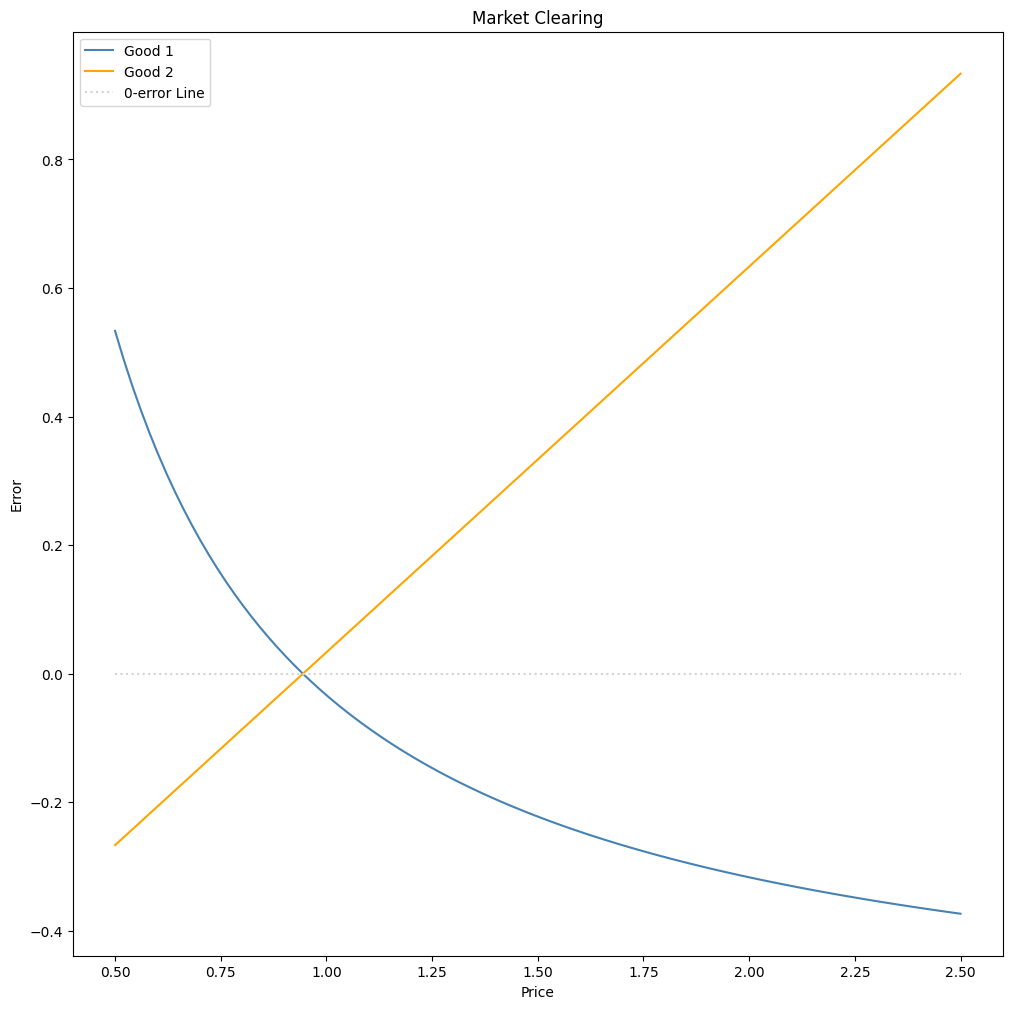

In [406]:
# 1) initialize
# the plot
fig, ax = plt.subplots(
    figsize=(12, 12)
)

# 1.1) plot title
ax.set_title(
    'Market Clearing'
)

# 2) set label 
# axis
ax.set_xlabel('Price')
ax.set_ylabel('Error')

ax.plot(price_range, error_good_1, color='steelblue', label='Good 1')
ax.plot(price_range, error_good_2, color='orange', label = "Good 2")
ax.hlines(
    y = 0,
    xmin= min(price_range),
    xmax = max(price_range),
    linestyles="dotted",
    label = "0-error Line",
    color = "lightgray"
)
ax.legend()

plt.show()

  ## Question 3

The `market clearing price` is the intersection of the two lines; however, this is a special case as the given `price range` incidentally intersects at the correct point where error is 0. This programmatically can be found as follows,

In [407]:
## find market clearing
## price
iterator = 0
for good_1, good_2 in zip(error_good_1, error_good_2):
    if np.isclose(good_1,good_2):
        print(round(price_range[iterator], 2))
    iterator += 1

0.94


## Question 4

In [408]:
## Define demand functions
## for consumer b
demand_1 = demand(fraction=beta, good = 1)
demand_2 = demand(fraction=beta, good = 2)

### Question 4.a)

In [409]:
# initialize utilit
# list
utility_a = 0
utility_max  = -1
equilibrium_price = 0
iterator = 1
results = dict()
for price in price_range:
    # calculate demand for each 
    # good
    good_1 = demand_1.function(good = [1-endowment[0], 1-endowment[1]], price = [price] + [1])
    good_2 = demand_2.function(good = [1-endowment[0], 1-endowment[1]], price = [price] + [1])
    
    # calculate utilit for
    # consumer a
    previous_utility = utility_a
    utility_a = utility(fraction=alpha, good = [1-good_1] + [1-good_2])
    
    if utility_a == 0:
        continue
    
    if utility_a > utility_max:
        utility_max = utility_a
    
    if utility_max - utility_a < 0.000001:
        utility_max = round(utility_max,5)
        equilibrium_price = round(price, 5)
        

In [410]:
## Print Results
print(
    dict(
        price = equilibrium_price,
        utility = utility_max
    )
)

{'price': 1.89394, 'utility': 0.63362}


### Question 4.b)

In [411]:
# initialize utilit
# list
utility_a = 0
utility_max  = -1
equilibrium_price = 0
iterator = 1
results = dict()
for price in np.linspace(start=0.1, stop = 10, num = 100000):
    # calculate demand for each 
    # good
    good_1 = demand_1.function(good = [1-endowment[0], 1-endowment[1]], price = [price] + [1])
    good_2 = demand_2.function(good = [1-endowment[0], 1-endowment[1]], price = [price] + [1])
    
    # calculate utilit for
    # consumer a
    previous_utility = utility_a
    utility_a = utility(fraction=alpha, good = [1-good_1] + [1-good_2])
    
    if utility_a == 0:
        continue
    
    if utility_a > utility_max:
        utility_max = utility_a
    
    if utility_max - utility_a < 0.000001:
        utility_max = round(utility_max,5)
        equilibrium_price = round(price, 5)
        

In [412]:
## Print Results
print(
    dict(
        price = equilibrium_price,
        utility = utility_max
    )
)

{'price': 1.90716, 'utility': 0.63362}


## Question 5

### Question 5.a)

In [413]:
# initial values
initial_utility_a = utility(fraction=alpha, good=endowment)
initial_utility_b = utility(fraction=beta, good=[1 - x for x in endowment])

# Set up goods
goods = np.array(range(0, 76)) / 75
# For each value there
# is in the goods, we scan through 
# the others
good_1_demand = []
good_2_demand = []
utility_1 = []
utility_2 = []

for good_1 in goods:
    for good_2 in goods:
        # Calculate the utility of each 
        # endowment
        utility_a = utility(fraction=alpha, good=[good_1, good_2])
        utility_b = utility(fraction=beta, good=[1 - good_1, 1 - good_2])

        # as long as the utility is higher
        # than the initial utility we continue
        # loop
        previous_utility = utility_a
        if utility_a >= previous_utility and utility_b >= initial_utility_b:
            good_1_demand.append(good_1)
            good_2_demand.append(good_2)
            utility_1.append(utility(fraction=alpha, good=[good_1, good_2]))


In [414]:
print(
    dict(
        utility = round(max(utility_1), 3)
    )
)


{'utility': 0.742}


In [415]:
# initial values
initial_utility_a = utility(fraction=alpha, good=endowment)
initial_utility_b = utility(fraction=beta, good=[1 - x for x in endowment])

# Set up goods
goods = np.linspace(start=0,stop=1,num=1000)
# For each value there
# is in the goods, we scan through 
# the others
good_1_demand = []
good_2_demand = []
utility_1 = []
utility_2 = []

for good_1 in goods:
    for good_2 in goods:
        # Calculate the utility of each 
        # endowment
        utility_a = utility(fraction=alpha, good=[good_1, good_2])
        utility_b = utility(fraction=beta, good=[1 - good_1, 1 - good_2])

        # as long as the utility is higher
        # than the initial utility we continue
        # loop
        previous_utility = utility_a
        if utility_a >= previous_utility and utility_b >= initial_utility_b:
            good_1_demand.append(good_1)
            good_2_demand.append(good_2)
            utility_1.append(utility(fraction=alpha, good=[good_1, good_2]))
        else:
            break

In [416]:
print(
    dict(
        utility = round(max(utility_1), 3)
    )
)

{'utility': 0.743}


## Question 6

In this question we assume that each consumer recieves `good 2` as a function of `good 1`, such that the following holds,

$good_2 = 1 - good_1$ 

### Question 6.a)


In [417]:
## 1) Define utility
## functions
def aggregate_utility(good):
    utility_a = utility(fraction=alpha, good  = [good] + [1-good])
    utility_b = utility(fraction=beta,  good  = [1 - good] + [good])

    return (utility_a, utility_b, utility_a + utility_b)

## 2) define space of goods
## with 10.000 pairs
good = np.linspace(start=0, stop=1, num = 100000)

## 3) calculate
## utilities based
## on the linear space
## of goods
utility_a, utility_b, total_utility = aggregate_utility(good)


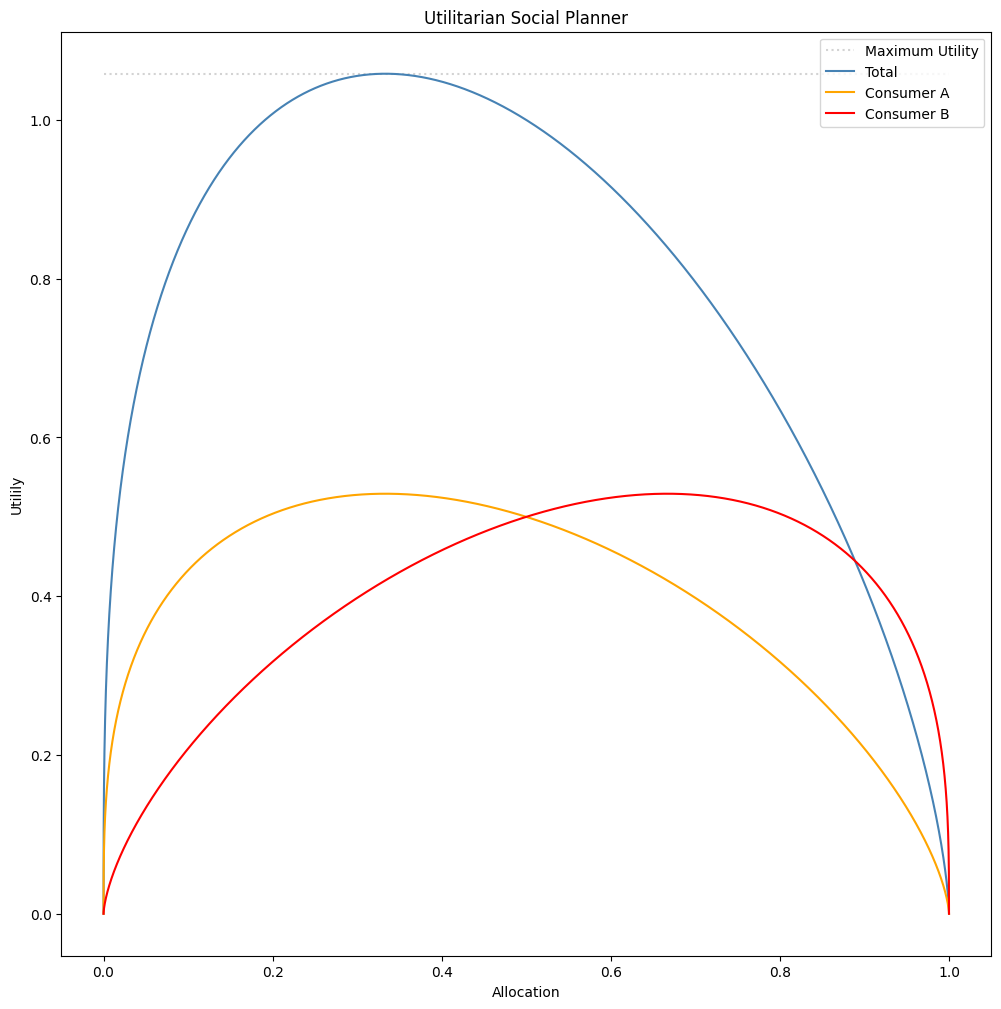

In [418]:
# 1) initialize
# the plot
fig, ax = plt.subplots(
    figsize=(12, 12)
)

# 1.1) plot title
ax.set_title(
    'Utilitarian Social Planner'
)

# 2) set label 
# axis
ax.set_xlabel('Allocation')
ax.set_ylabel('Utilily')
ax.hlines(
    y = np.max(total_utility),
    xmin= np.min(good),
    xmax = np.max(good),
    linestyles="dotted",
    label = "Maximum Utility",
    color = "lightgray"
)
ax.plot(good, total_utility, color='steelblue', label='Total')
ax.plot(good, utility_a, color='orange', label='Consumer A')
ax.plot(1-good, utility_b, color='red', label='Consumer B')
ax.legend()

plt.show()


In [419]:
## 1) Locate the maximum
## utility value
location = np.argmax(total_utility)

## 2) get the values
## accordingly
print(
    "Maximized Utility is:", str(round(total_utility[location], 3))
)
print("Person A:")
print(
    f"Good 1: {round(good[location], 3)} and Good 2: {round(good[location], 3)}"
)
print("Person B:")
print(
    f"Good 1: {round(1-good[location], 3)} and Good 2: {round(1-good[location], 3)}"
)

Maximized Utility is: 1.058
Person A:
Good 1: 0.333 and Good 2: 0.333
Person B:
Good 1: 0.667 and Good 2: 0.667


### Question 6.b)

Intentionally skipped.

## Question 7)

For this question we use the `seed` 1903 for reproducibility. 

In [426]:
## 1) set the seed for
## reporducibility
np.random.seed(1903)

## 2) Generate uniformly distribution
## allocation of goods
good_1 = np.random.uniform(low=0.0, high=1.0, size=50)
good_2 = np.random.uniform(low=0.0, high=1.0, size=50)

These values can be `plotted` as follows,

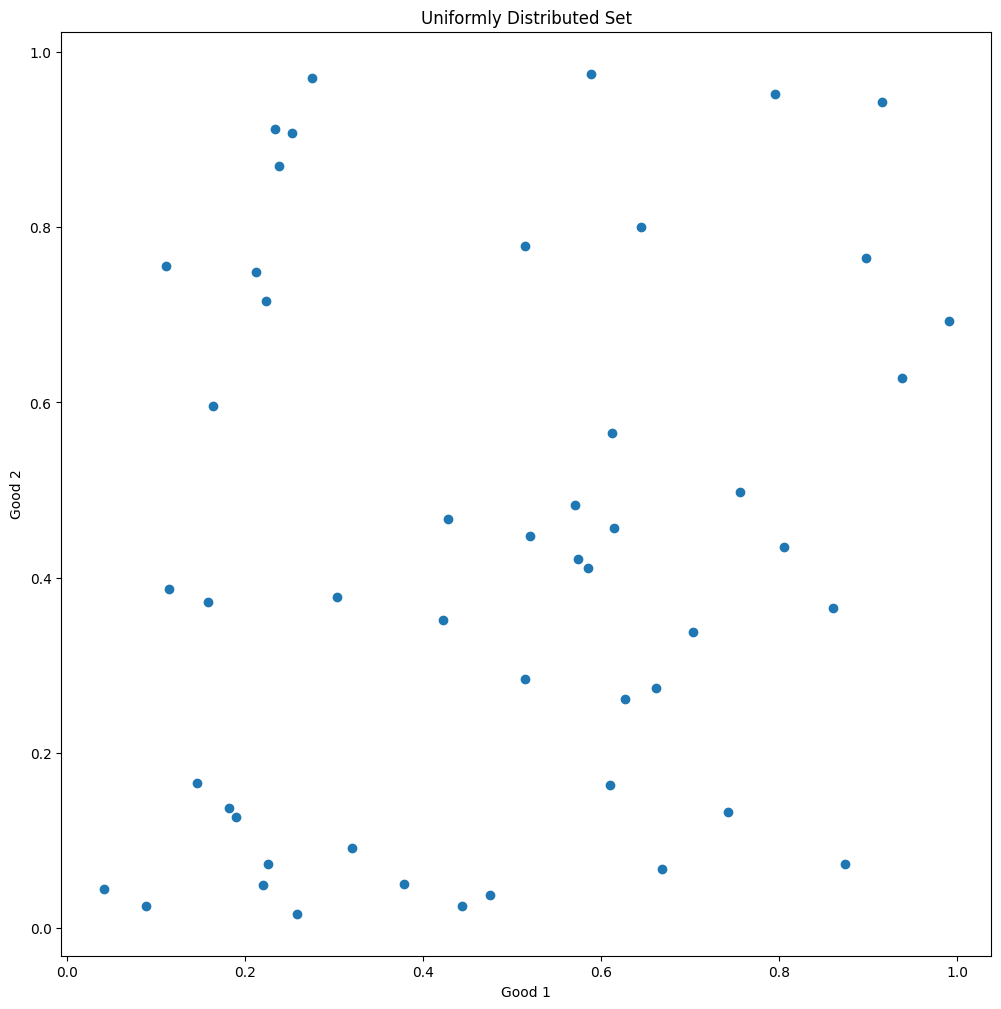

In [427]:
# 1) initialize
# the plot
fig, ax = plt.subplots(
    figsize=(12, 12)
)

# 1.1) plot title
ax.set_title(
    'Uniformly Distributed Set'
)

# 2) set label 
# axis
ax.set_xlabel('Good 1')
ax.set_ylabel('Good 2')
ax.scatter(good_1, good_2)

plt.show()

## Question 8

The market equilibrium of randomly allocated goods, must be such that both consumers are better off from their initial random endowment.

In [436]:
## 2) cross join
## the goods and store
## as good_1 an good_2
#good_1, good_2 = np.meshgrid(good_1, good_2)
initial_utility_a = utility(fraction=alpha, good=[good_1[0], good_2[0]])
initial_utility_b = utility(fraction=alpha, good=[1-good_1[0], 1-good_2[0]])

## 3) calculate the utility
## for all possible values
utility_a_values = utility(fraction=alpha, good=[good_1, good_2])
utility_b_values = utility(fraction=beta, good=[1-good_1, 1-good_2])

## 4) locate all cases where
## the utility is higher than the initial utility
## for each consumer
idx = (utility_a_values >= initial_utility_a) & (utility_b_values >= initial_utility_b)

## 5) select all 
## values that match
good_1_demand = good_1[idx]
good_2_demand = good_2[idx]

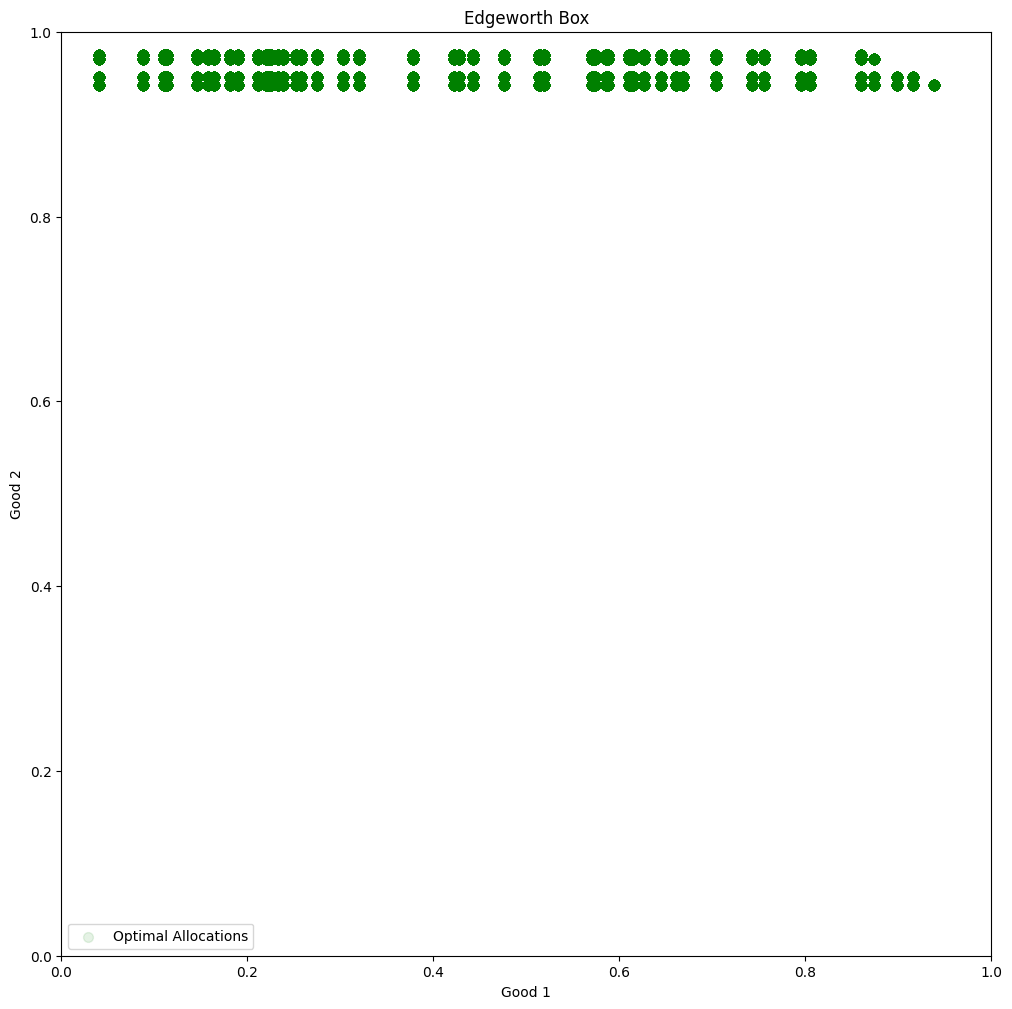

In [437]:
## 1) set the boundaries
## for each good
total_good1 = 1
total_good2 = 1

## 2) initialise
## the plot as ax
fig, ax = plt.subplots(figsize=(12, 12))

## 3) set the limits for the
## y- and x-axis;
ax.set_xlim(0, total_good1)
ax.set_ylim(0, total_good2)

## 4) add labels
## good 1 and good 2, with 
## an appropriate title
ax.set_xlabel('Good 1')
ax.set_ylabel('Good 2')
ax.set_title('Edgeworth Box')

## 5) plot origins of each
## consumer (Not necessary)
## but why not.


## 6) add all points
## where there is a
## pareto improvement
ax.scatter(
    good_1_demand,
    good_2_demand,
    s = 50,
    color='green',
    label='Optimal Allocations',
    alpha = 0.1
)

## 8) add a legend
## (self-generated)
ax.legend()

## 9) show the
## plot
plt.show()